✅ Superstore.csv Loaded

📌 Extracted Columns:
   Region  Total_Sales
0  South     261.9600
1  South     731.9400
2   West      14.6200
3  South     957.5775
4  South      22.3680

📊 Region-wise Total Sales:
     Region  Total_Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245

✅ Data stored in SQLite DB

🧾 Data from DB:
     Region  Total_Sales
0  Central  501239.8908
1     East  678781.2400
2    South  391721.9050
3     West  725457.8245

🧼 Checking for Missing Values:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

📈 Summary Statistics:
            Row ID   Postal Code       

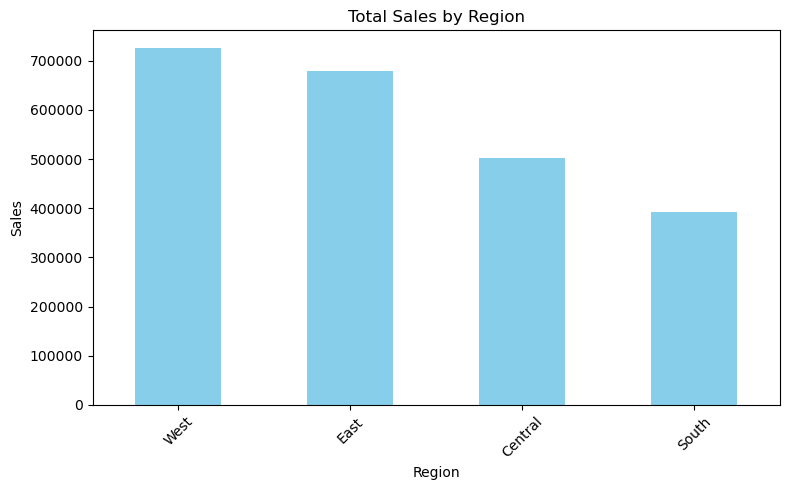


📊 Sales by Category:
 Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


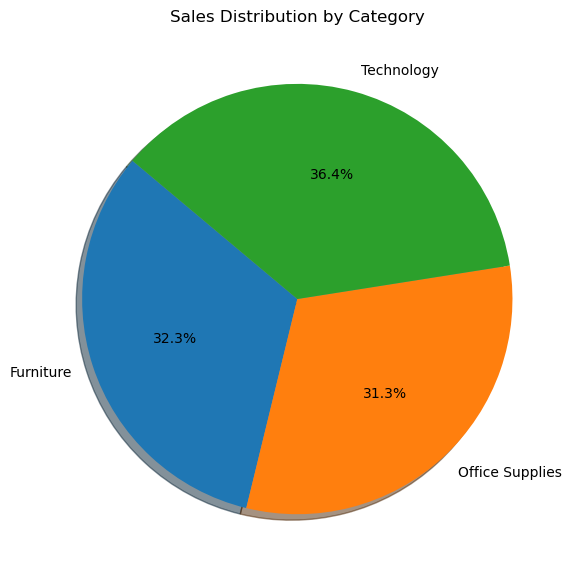

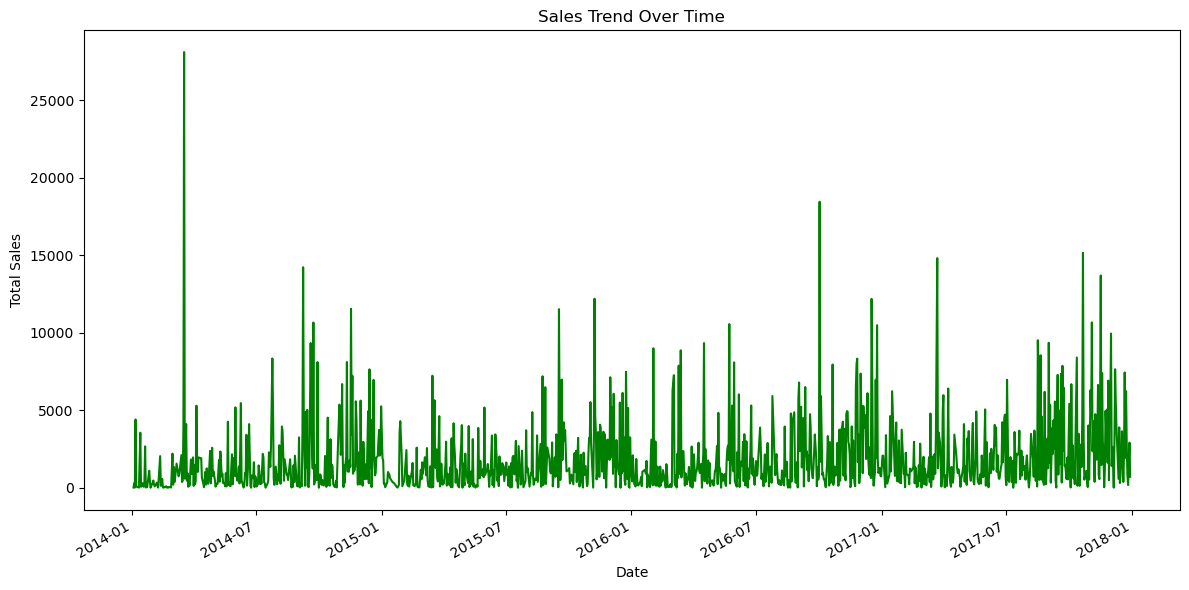


✅ All ETL and EDA tasks completed successfully!


In [2]:

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

#Load the dataset with correct encoding
df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')
print("✅ Superstore.csv Loaded")

#Extract required columns
df_etl = df[['Region', 'Sales']].copy()
df_etl = df_etl.rename(columns={'Sales': 'Total_Sales'})
print("\n📌 Extracted Columns:\n", df_etl.head())

#Transform - Group by Region
region_sales = df_etl.groupby('Region').sum().reset_index()
print("\n📊 Region-wise Total Sales:\n", region_sales)

#Step 3: Load - Store in SQLite database
conn = sqlite3.connect('retail_sales.db')
region_sales.to_sql('RegionSales', conn, if_exists='replace', index=False)
print("\n✅ Data stored in SQLite DB")

#Step 4: Read from DB (test)
print("\n🧾 Data from DB:\n", pd.read_sql("SELECT * FROM RegionSales", conn))

print("\n Checking for Missing Values:")
print(df.isnull().sum())

print("\n📈 Summary Statistics:")
print(df.describe())

# Total Sales by Region (again for visual)
region_sales_plot = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Bar Chart - Region Sales
plt.figure(figsize=(8, 5))
region_sales_plot.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum()
print("\n Sales by Category:\n", category_sales)

#Pie Chart - Sales by Category
plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

#Sales Over Time
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_over_time = df.groupby('Order Date')['Sales'].sum()

#Line Chart - Sales Trend
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', color='green')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

print("\n All ETL and EDA tasks completed successfully!")
